In [392]:
from collections import OrderedDict
import itertools
import pandas as pd
import csv

import plotly
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
import math
import json
import pyfpgrowth
from pymining import itemmining

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt, mpld3
import matplotlib
import matplotlib.cm as cm


In [384]:
def scatt():
    fig, ax = plt.subplots(subplot_kw=dict(facecolor='#EEEEEE'))
    x = [1,2,3,4,5]
    y=[2,3,5,7,9]
    
    x2=[1,3,4,5]
    y2=[1,2,3,4]

    scatter = ax.scatter(x,
                     y )
    scatter2 = ax.scatter(x2,y2)
    ax.grid(color='white', linestyle='solid')

    ax.set_title("Scatter Plot (with tooltips!)", size=20)
    for i in range(0,8):
        ax.text(0.5,0.5,'hello',fontsize=12)
    labels = ['point {0}'.format(i) for i in y]
    labels2 = ['point {0}'.format(i) for i in y2]
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)
    tooltip = mpld3.plugins.PointLabelTooltip(scatter2, labels=labels2)
    mpld3.plugins.connect(fig, tooltip)
    plt.text(0.5,12,'hello')
    #mpld3.enable_notebook()
    plt.show()

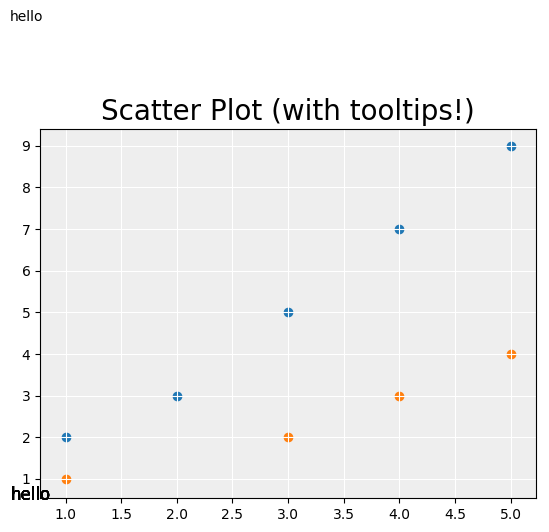

In [385]:
scatt()

In [2]:
src = 'freqgenres.csv'

In [3]:
def truecount(sourceips):    
    c = {}
    for x in sourceips:
       c[x] = 0
    for x in sourceips:
       c[x] += 1   
    return c   

In [4]:
def extractgenres(genres_column):    
   splitdata = tuple()
   for x in genres_column:
     if '|' in x:
      x = x.split('|') 
      splitdata = splitdata + (tuple(x),)
     else:
      splitdata = splitdata + (tuple([x]),)
   return splitdata

In [5]:
def frequentpatterns(data):
    relim_input = itemmining.get_relim_input(data)
    report = itemmining.relim(relim_input, min_support=4)
    
    #sort the genres based on their frequency (from most frequent to least) 
    sorted_x = OrderedDict(sorted(report.items(), key=lambda x: x[1], reverse=True))   
    sorted_x = dict(sorted_x)
  
    sorted_x = {tuple(k) : v for k, v in sorted_x.items()}
    return sorted_x

In [47]:
def listoftuplestolistofstrings(x):
    
    genres = []
    
    for genre_combi in x:
      if len(genre_combi) > 1:
          genre_name = ""
          for genre in genre_combi:
              genre_name += str(genre)
              genre_name += ", "
          genre_name = genre_name[:-2]
          genres.append(genre_name)
      else:
          for genre in genre_combi:
              genres.append(str(genre))
    
    return genres

In [188]:
def rating(sorted_value, isglobal,userid):
  avg_rating_per_genre = {}  
  for item in sorted_value:
    genres = []    
    if ',' in item:
        genres = item.split(', ')
        if(isglobal):
            ratings = df.loc[df['genres'].apply(lambda sentence: all(word in sentence for word in genres)),'ratings']        
        else:
            ratings = df.loc[df['genres'].apply(lambda sentence: all(word in sentence for word in genres))&(df['userId']==userid),'ratings']
        #print(ratings)
    else:
        if(isglobal):
            ratings = df.loc[df['genres'].apply(lambda sentence: all(word in sentence for word in genres)),'ratings']  
        else:
            ratings = df.loc[df['genres'].str.contains(item)&(df['userId']==userid),'ratings']
    
    avg_rating = round(sum(ratings)/len(ratings),2)
    avg_rating_per_genre[item] = str(avg_rating)
  return avg_rating_per_genre

In [178]:
def barchart(x,y):
  
  y = normalize(y)  
    
  y_pos = np.arange(len(x))
   
  plt.barh(y_pos, y, align='center', alpha=0.2)
  plt.yticks(y_pos, x)
  plt.ylabel('genres')
  plt.xlabel('frequencies')
  
  plt.show()

In [192]:
def scatterplot(ratingg,freqg,ratingu,frequ):
    freqg = normalize(freqg)
    frequ = normalize(frequ)
    print(freqg)
    print(frequ)
    plt.scatter(list(ratingg.values()),freqg,marker='o',label="global")
    plt.scatter(list(ratingu.values()),frequ, marker='+',label="user")
    plt.grid(color='white', linestyle='solid')
    plt.ylabel('frequencies')
    plt.xlabel('ratings')
    plt.legend(loc=2)
    plt.show()

In [386]:
def scatterplot2(ratingg,freqg,freqgenres,ratingu,frequ,frequgenres):
    fig, ax = plt.subplots(subplot_kw=dict(facecolor='#EEEEEE'))
    #N = 100
    freqg = normalize(freqg)
    frequ = normalize(frequ)
    #print(freqg)
    #print(freqgenres)
    
    
    Labels = ["g","u",]
    scatter = ax.scatter(list(ratingg.values()),freqg, color="orange",marker='o', alpha=0.3)
    ax.plot([], [],"o", color="orange", label="Global")
    scatter2 = ax.scatter(list(ratingu.values()),frequ, color="blue", marker='o', alpha=0.3)
    ax.plot([], [], "o", color="blue",  label="User-specific")
    ax.grid(color='white', linestyle='solid')

    ax.set_title("global vs user", size=20)
    
    labels = ['{0}'.format(i) for i in freqgenres]
    labeluser = ['{0}'.format(i) for i in frequgenres]
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    tooltipu = mpld3.plugins.PointLabelTooltip(scatter2, labels=labeluser)
    mpld3.plugins.connect(fig, tooltip)
    mpld3.plugins.connect(fig,tooltipu)
    
    ax.legend( loc="best", framealpha=0)
    #line_collections = [scatter,scatter2]
    #interactive_legend = mpld3.plugins.InteractiveLegendPlugin(line_collections, Labels)
    #mpld3.plugins.connect(fig, interactive_legend)
    
   
    plt.ylabel('frequencies')
    plt.xlabel('ratings')
    #plt.legend(loc=2)
    plt.show()


In [541]:
def scatterplot3(ratingg,freqg,freqgenres,ratingu,frequ,frequgenres):
    fig, ax = plt.subplots(subplot_kw=dict(facecolor='#EEEEEE'))
    #N = 100
    freqg = normalize(freqg)
    frequ = normalize(frequ)
    #print(freqg)
    #print(freqgenres)
    
    #colors based on genres
    genres = list(set(freqgenres+frequgenres))
    genres_color = {}
    #print(len(genres))
    colors = cm.rainbow(np.linspace(0.0, 1.0, len(genres)))
    #print(len(colors))
    Formattedcolor = []
    for i in range(0,len(colors)):
        myFormattedcolor = [ '%.2f' % elem for elem in colors[i] ]
        Formattedcolor.append(myFormattedcolor)
    print(Formattedcolor)
    
    genres_color= dict(zip(genres, Formattedcolor))
    print(genres_color)
    
    ratingfreqg = dict(zip(freqg,ratingg.values()))
    ratingfrequ = dict(zip(frequ,ratingu.values()))
    
    #print(ratingg)
    
    genre_global = dict(zip(freqg,freqgenres))
    genre_user = dict(zip(frequ,frequgenres))
    #print(genre_global)
    Labels = ["g","u",]
    #color = np.random.random(size=10)
    #color = []
    #color.append(list([0.5, 0.5, 0.2]))
    #color.append(list([0.25,0.25,0.6]))
    #print(color)
    for i in freqg:
        print(ratingfreqg[i],i,genres_color[genre_global[i]])
        scatter = ax.scatter(ratingfreqg[i],i, c=genres_color[genre_global[i]], alpha=0.3)
        #ax.annotate(str(genre_global[i]),(ratingfreqg[i],i))
        #ax.plot([], [],"o", color="orange", label="Global")
                           
    for i in frequ:
        scatter2 = ax.scatter(ratingfrequ[i],i, c=genres_color[genre_user[i]], marker='x', alpha=0.3)
        #ax.plot([], [], "o", color="blue",  label="User-specific")genres_color[genre_user[i]]
                             
    #for i in frequ:                            
        #print(Formattedcolor[i])
        #scatter2 = ax.scatter(list(ratingu.values()),frequ, c=genres_color[genre_user[i]], marker='x', alpha=0.3)
    
    ax.grid(color='white', linestyle='solid')

    ax.set_title("global vs user", size=20)
    
    labels = ['{0}'.format(i) for i in freqgenres]
    labeluser = ['{0}'.format(i) for i in frequgenres]
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    tooltipu = mpld3.plugins.PointLabelTooltip(scatter2, labels=labeluser)
    mpld3.plugins.connect(fig, tooltip)
    mpld3.plugins.connect(fig,tooltipu)
    
    ax.legend( loc="best", framealpha=0)
    #line_collections = [scatter,scatter2]
    #interactive_legend = mpld3.plugins.InteractiveLegendPlugin(line_collections, Labels)
    #mpld3.plugins.connect(fig, interactive_legend)
   
    plt.ylabel('frequencies')
    plt.xlabel('ratings')
    #plt.legend(loc=2)
    plt.show()

In [158]:
def normalize(values):
    #normalize frequencies  
    ny = []
    for i in values:
        i = i/sum(values)
        ny.append(i)
    return ny

In [91]:
df = pd.read_csv(src) 

# Global genre freq.

In [102]:
genres_column = tuple(df['genres']) 
ratings_column = tuple(df['ratings'])
   #extract genres - data processing   
splitdata = extractgenres(genres_column)   
   #find frequent genre combinations, sorted for all users
sorted_x = frequentpatterns(splitdata)

In [180]:
print(splitdata)

(('Drama',), ('Animation', 'Children', 'Drama', 'Musical'), ('Thriller',), ('Action', 'Adventure', 'Sci-Fi', 'Thriller'), ('Drama',), ('Drama', 'War'), ('Action', 'Adventure', 'Drama'), ('Drama',), ('Fantasy', 'Horror', 'Romance', 'Thriller'), ('Thriller',), ('Adventure', 'Sci-Fi'), ('Adventure', 'Animation', 'Comedy', 'Crime'), ('Action', 'Crime', 'Thriller'), ('Action', 'Adventure', 'Sci-Fi'), ('Adventure', 'Comedy'), ('Action', 'Adventure', 'Fantasy'), ('Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'), ('Drama', 'Horror', 'Sci-Fi', 'Thriller'), ('Adventure', 'Comedy', 'Fantasy', 'Sci-Fi'), ('Comedy', 'Western'), ('Action', 'Adventure', 'Thriller'), ('Drama', 'Romance'), ('Comedy', 'Romance'), ('Mystery', 'Thriller'), ('Crime', 'Mystery', 'Thriller'), ('Comedy', 'Drama', 'Romance'), ('Drama',), ('Action', 'Drama', 'War'), ('Comedy',), ('Adventure', 'Drama', 'IMAX'), ('Action', 'Adventure', 'Comedy', 'Crime'), ('Drama', 'Thriller', 'War'), ('Action', 'Crime', 'Thriller'), ('

In [181]:
print(sorted_x)

{('Drama',): 44752, ('Comedy',): 38026, ('Action',): 27056, ('Thriller',): 25240, ('Adventure',): 22017, ('Romance',): 19336, ('Crime',): 16266, ('Sci-Fi',): 15365, ('Action', 'Thriller'): 12145, ('Action', 'Adventure'): 12107, ('Comedy', 'Romance'): 11012, ('Romance', 'Drama'): 10704, ('Fantasy',): 10657, ('Comedy', 'Drama'): 10431, ('Drama', 'Thriller'): 9704, ('Action', 'Sci-Fi'): 9451, ('Crime', 'Thriller'): 8825, ('Children',): 8680, ('Crime', 'Drama'): 8411, ('Mystery',): 7625, ('Adventure', 'Sci-Fi'): 7138, ('Comedy', 'Adventure'): 7086, ('Horror',): 6790, ('Action', 'Drama'): 6670, ('Animation',): 6170, ('Action', 'Crime'): 6052, ('Sci-Fi', 'Thriller'): 5902, ('Fantasy', 'Adventure'): 5568, ('Mystery', 'Thriller'): 5429, ('Comedy', 'Action'): 5352, ('Adventure', 'Action', 'Sci-Fi'): 5229, ('Comedy', 'Fantasy'): 5097, ('War',): 5025, ('Animation', 'Children'): 4987, ('Adventure', 'Thriller'): 4915, ('Comedy', 'Children'): 4754, ('Musical',): 4722, ('Adventure', 'Children'): 4668

# User-specific genre freq

In [182]:
userid = 2

In [183]:
user_genres = tuple(df.loc[df['userId']==userid,'genres'])
splituserdata = extractgenres(user_genres)
print(splituserdata)

(('Action', 'Adventure', 'Thriller'), ('Drama', 'Romance'), ('Comedy', 'Romance'), ('Mystery', 'Thriller'), ('Crime', 'Mystery', 'Thriller'), ('Comedy', 'Drama', 'Romance'), ('Drama',), ('Action', 'Drama', 'War'), ('Comedy',), ('Adventure', 'Drama', 'IMAX'), ('Action', 'Adventure', 'Comedy', 'Crime'), ('Drama', 'Thriller', 'War'), ('Action', 'Crime', 'Thriller'), ('Action', 'Drama', 'Romance'), ('Action', 'Crime', 'Thriller'), ('Comedy', 'Romance'), ('Action', 'Adventure', 'Sci-Fi'), ('Drama', 'Romance'), ('Comedy',), ('Drama', 'Thriller'), ('Comedy', 'Drama'), ('Comedy',), ('Drama', 'Horror'), ('Drama',), ('Drama', 'Fantasy', 'Romance'), ('Drama', 'Romance', 'War', 'Western'), ('Comedy', 'Drama'), ('Drama', 'Horror', 'Sci-Fi'), ('Action', 'Drama', 'Sci-Fi', 'Thriller'), ('Comedy', 'Crime', 'Drama', 'Thriller'), ('Drama',), ('Children', 'Drama', 'Fantasy', 'Mystery'), ('Comedy', 'Drama', 'Fantasy'), ('Comedy', 'Drama', 'Thriller'), ('Comedy', 'Romance'), ('Action', 'Crime', 'Drama', 'T

In [184]:
sorted_user = frequentpatterns(splituserdata) 

In [185]:
print(sorted_user)

{('Drama',): 39, ('Comedy',): 32, ('Romance',): 22, ('Thriller',): 21, ('Action',): 19, ('Comedy', 'Romance'): 13, ('Romance', 'Drama'): 13, ('Adventure',): 12, ('Comedy', 'Drama'): 12, ('Fantasy',): 10, ('Drama', 'Thriller'): 10, ('Crime',): 9, ('Action', 'Thriller'): 9, ('Children',): 8, ('Crime', 'Thriller'): 7, ('Animation',): 6, ('Action', 'Crime'): 6, ('Action', 'Adventure'): 6, ('Sci-Fi',): 5, ('War',): 5, ('Drama', 'War'): 5, ('Animation', 'Children'): 5, ('Comedy', 'Fantasy'): 5, ('Comedy', 'Adventure'): 5, ('Comedy', 'Action'): 5, ('Comedy', 'Romance', 'Drama'): 5, ('Horror',): 4, ('Musical',): 4, ('Musical', 'Animation'): 4, ('Musical', 'Animation', 'Children'): 4, ('Musical', 'Children'): 4, ('Mystery',): 4, ('Action', 'Sci-Fi'): 4, ('Animation', 'Adventure'): 4, ('Fantasy', 'Children'): 4, ('Action', 'Crime', 'Thriller'): 4, ('Fantasy', 'Drama'): 4, ('Action', 'Drama'): 4}


Select 20 most freq genres

In [186]:
freqgenres, freqvalues, freqsgenres, freqsvalues = [], [] , [], []  
allusergenres = itertools.islice(sorted_x.items(), 0, 20) 
singleusergenres = itertools.islice(sorted_user.items(),0,20)
for key, value in allusergenres:
       freqgenres.append(key)
       freqvalues.append(value)
       
for key,value in singleusergenres:
       freqsgenres.append(key)
       freqsvalues.append(value)


['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Romance', 'Crime', 'Sci-Fi', 'Action, Thriller', 'Action, Adventure', 'Comedy, Romance', 'Romance, Drama', 'Fantasy', 'Comedy, Drama', 'Drama, Thriller', 'Action, Sci-Fi', 'Crime, Thriller', 'Children', 'Crime, Drama', 'Mystery']
['Drama', 'Comedy', 'Romance', 'Thriller', 'Action', 'Comedy, Romance', 'Romance, Drama', 'Adventure', 'Comedy, Drama', 'Fantasy', 'Drama, Thriller', 'Crime', 'Action, Thriller', 'Children', 'Crime, Thriller', 'Animation', 'Action, Crime', 'Action, Adventure', 'Sci-Fi', 'War']


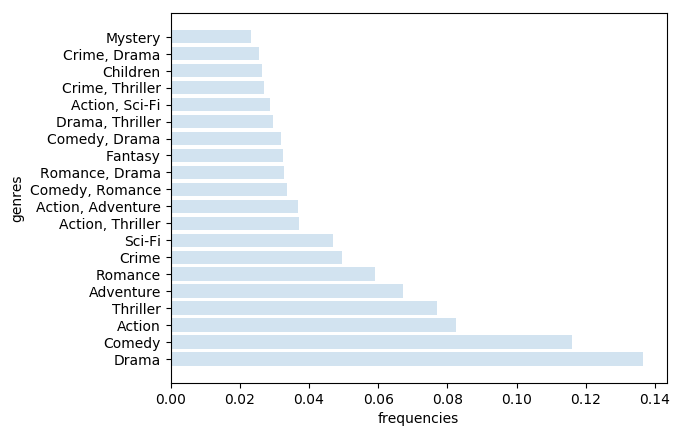

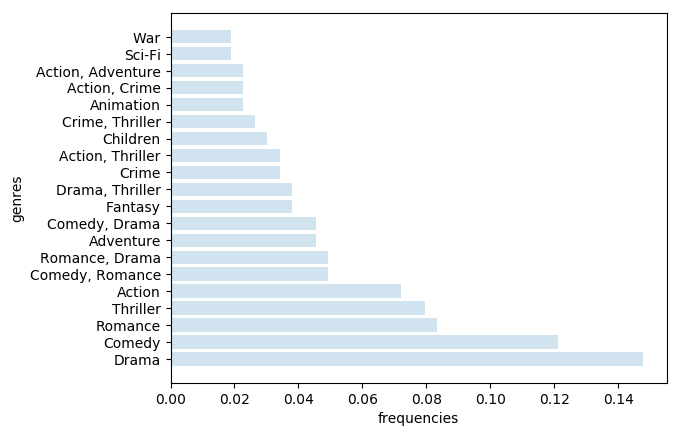

In [187]:
freqgenres = listoftuplestolistofstrings(freqgenres) 
freqsgenres = listoftuplestolistofstrings(freqsgenres)
print(freqgenres)
print(freqsgenres)
barchart(freqgenres,freqvalues) 
barchart(freqsgenres,freqsvalues)

average rating vs. freq genre combinations

In [189]:
avg_global_rating = rating(freqgenres,True,userid)
avg_user_rating =  rating(freqsgenres,False,userid)


In [190]:
print(list(avg_user_rating.values()))
print(freqsvalues)



['3.62', '3.09', '3.59', '3.33', '3.32', '3.23', '3.77', '3.75', '2.92', '3.4', '3.2', '3.67', '3.44', '3.5', '3.71', '3.67', '3.67', '3.5', '3.8', '3.8']
[39, 32, 22, 21, 19, 13, 13, 12, 12, 10, 10, 9, 9, 8, 7, 6, 6, 6, 5, 5]


Print it in scatterplot

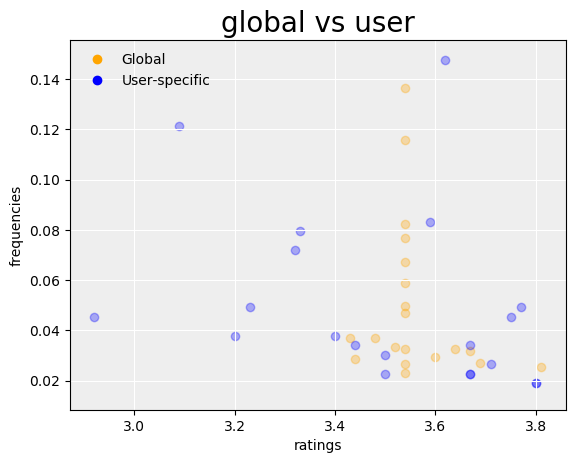

[44752, 38026, 27056, 25240, 22017, 19336, 16266, 15365, 12145, 12107, 11012, 10704, 10657, 10431, 9704, 9451, 8825, 8680, 8411, 7625] [39, 32, 22, 21, 19, 13, 13, 12, 12, 10, 10, 9, 9, 8, 7, 6, 6, 6, 5, 5]


In [543]:
scatterplot2(avg_global_rating,freqvalues,freqgenres,avg_user_rating,freqsvalues,freqsgenres)
print(freqvalues,freqsvalues)
#scatterplot(avg_user_rating,freqsvalues)

[['0.50', '0.00', '1.00', '1.00'], ['0.41', '0.14', '1.00', '1.00'], ['0.32', '0.28', '0.99', '1.00'], ['0.23', '0.41', '0.98', '1.00'], ['0.14', '0.54', '0.96', '1.00'], ['0.05', '0.66', '0.94', '1.00'], ['0.04', '0.75', '0.91', '1.00'], ['0.14', '0.84', '0.88', '1.00'], ['0.23', '0.91', '0.84', '1.00'], ['0.32', '0.96', '0.80', '1.00'], ['0.41', '0.99', '0.76', '1.00'], ['0.50', '1.00', '0.70', '1.00'], ['0.59', '0.99', '0.66', '1.00'], ['0.68', '0.96', '0.60', '1.00'], ['0.77', '0.91', '0.54', '1.00'], ['0.86', '0.84', '0.48', '1.00'], ['0.96', '0.75', '0.41', '1.00'], ['1.00', '0.66', '0.35', '1.00'], ['1.00', '0.54', '0.28', '1.00'], ['1.00', '0.41', '0.21', '1.00'], ['1.00', '0.28', '0.14', '1.00'], ['1.00', '0.14', '0.07', '1.00'], ['1.00', '0.00', '0.00', '1.00']]
{'Crime': ['0.50', '0.00', '1.00', '1.00'], 'Children': ['0.41', '0.14', '1.00', '1.00'], 'Crime, Thriller': ['0.32', '0.28', '0.99', '1.00'], 'Crime, Drama': ['0.23', '0.41', '0.98', '1.00'], 'Drama': ['0.14', '0.54'

C:\Users\Jaya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



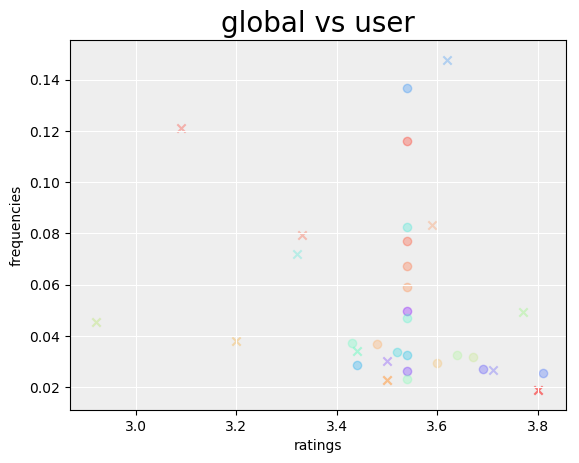

In [542]:
scatterplot3(avg_global_rating,freqvalues,freqgenres,avg_user_rating,freqsvalues,freqsgenres)